<h2>Spiral dataset in Keras library</h2> 
This code is a modified version of the code from this tutorial at <a href="https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/">MachineLearningMastery</a>.

<h2>Load data</h2>

In [1]:
# Ignore future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# set randomizer seed
# Note that setting seed for Keras with TensorFlow backend seems to be problematic
tf.set_random_seed(42)
np.random.seed(42)

# Load data
df = pd.read_csv('data/spiral.csv')
np_data = df.values

# Split data into X and y
X = np_data[:,0:-1]
Y_raw = np_data[:,-1]

# shuffle data
X, Y_raw = shuffle(X, Y_raw, random_state=0)

# Convert labels to one-hot vectors
Y = np_utils.to_categorical(Y_raw, 3)

print("Attributes: {}".format(X.shape[1]))
print("Labels: {}".format(Y.shape[1]))
print("Instances: {}".format(Y.shape[0]))

Using TensorFlow backend.


Attributes: 2
Labels: 3
Instances: 300


<h2>Define and evaluate model</h2>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
import time
from sklearn.metrics import accuracy_score

def build_model():
    # Create model
    model = Sequential()
    model.add(Dense(42, input_dim=2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def evaluate_model():
    # Start timer
    start = time.time()

    # Build model
    model = build_model()
    # Train the model
    model.fit(X, Y, epochs=400, batch_size=20, verbose=0)
    # Evaluate accuracy
    score = model.evaluate(X, Y, verbose=0)

    # Stop timer
    end = time.time()

    # Print results
    print("  Acc: %.2f%%  Time: %.2f sec" % (score[1] * 100, end - start))

# Note that the classifier can give a slightly different result for each run
# since we cannot solve all seed issues with Keras using TensorFlow backend
for i in range(5):
    print("Result from iteration {}".format(i+1))
    evaluate_model()

Result from iteration 1
  Acc: 99.33%  Time: 20.93 sec
Result from iteration 2
  Acc: 99.00%  Time: 18.76 sec
Result from iteration 3
  Acc: 99.33%  Time: 10.45 sec
Result from iteration 4
  Acc: 99.33%  Time: 11.10 sec
Result from iteration 5
  Acc: 99.00%  Time: 12.32 sec


<h2>3-fold Cross Validation</h2>

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier

# Build classifier
estimator = KerasClassifier(build_fn=build_model, epochs=400, batch_size=20, verbose=0)

# Create folds
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Calculate cross validation score
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Average accuracy: %.2f%% (stdev = %.2f%%)" % (results.mean() * 100, results.std() * 100))

Average accuracy: 96.00% (stdev = 1.63%)


<h2>Confusion Matrix</h2>

Accuracy: 99.33%
Confusion Matrix:
[[ 99   1   0]
 [  0 100   0]
 [  0   1  99]]


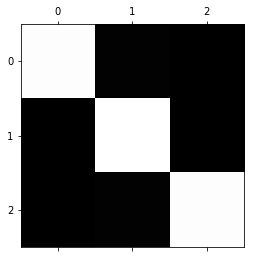

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Build model
model = build_model()
# Train the model
model.fit(X, Y, epochs=400, batch_size=20, verbose=0)
    
# Predict training data
predictions = model.predict(X)
# Predictions and labels (Y) are one-hot vectors, so we need to convert
# them to single values using the argmax function
Y_fixed = Y.argmax(1)
predictions = predictions.argmax(1)
accuracy = accuracy_score(Y_fixed, predictions)
print("Accuracy: {0:0.2f}%".format(accuracy*100))

# confusion matrix
print("Confusion Matrix:")
conf_mx = confusion_matrix(Y_fixed, predictions)
print(conf_mx)
# Visualize (normalized) confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()